# Are graph embeddings continuous? (Embedding by eingenmap)

Example of a chain of $N$ vertices and a cycle made of the same vertices. Both graphs are connected, so according to the continuity theorem for eigenvectors, their eigenmap embeddings should be close. This notebook verifies this fact empirically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from graph_embedding_continuity import *

In [2]:
N = 20

In [3]:
chain = generate_chain(N)
cycle = generate_cycle(N)

# add some random weights on each edge,
# same weight for the edges common to
# the chain and the cycle.
shared_weights = np.random.rand(N-1)

for v, _ in chain.edges():
    chain[v][v+1]['weight'] = shared_weights[v]
    cycle[v][v+1]['weight'] = shared_weights[v]

# put a tiny weight on the closing edge of the cycle.
cycle[N-1][0]['weight'] = 0.01*np.random.rand()

# save layout
pos = nx.shell_layout(cycle)

## Continuous embedding closing of a loop.

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


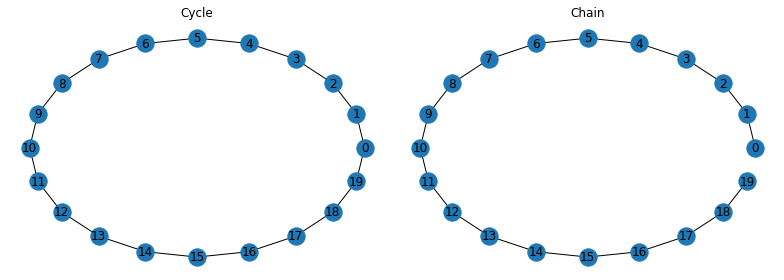

In [4]:
# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=2)

ax = axes[0]
nx.draw_networkx(cycle, pos = pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')
    
ax = axes[1]
nx.draw_networkx(chain, pos = pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('chain_cycle.eps')

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


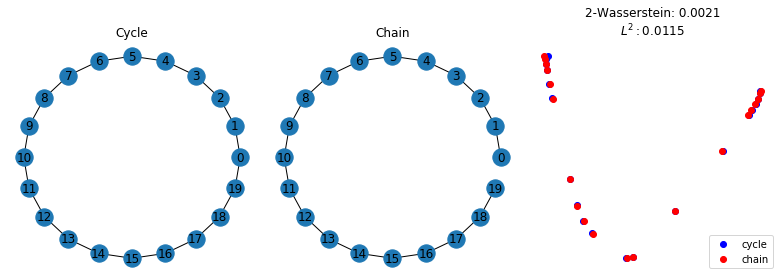

In [5]:
emb_cycle, _ = eigenmap_embedding(cycle, k=3, normalize=True, use_sparse=False)
emb_chain, _ = eigenmap_embedding(chain, k=3, normalize=True, use_sparse=False)

emb_cycle = emb_cycle[:, 1:]
emb_chain = emb_chain[:, 1:]

wass_distance = wasserstein_metric(emb_cycle, emb_chain)
l2_distance = np.linalg.norm(emb_cycle-emb_chain, ord=2)
    
# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=3)

ax = axes[0]
nx.draw_networkx(cycle, pos = pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')
    
ax = axes[1]
nx.draw_networkx(chain, pos = pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')

ax = axes[2]
ax.scatter(emb_cycle[:, 0], emb_cycle[:, 1], label='cycle', color='b')
ax.scatter(emb_chain[:, 0], emb_chain[:, 1], label='chain', color='r')
ax.set_title('2-Wasserstein: {:.4f}\n$L^2: {:.4f}$'.format(wass_distance, l2_distance))
ax.legend(loc='lower right')
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('eigenmap_chain_cycle.eps')